
# LSA

`Latent Semantic Analysis (LSA)` is a theory and method for extracting and representing the contextual-usage meaning of words by statistical computations applied to a large corpus of text.

LSA is an information retrieval technique which analyzes and identifies the pattern in unstructured collection of text and the relationship between them.

LSA is an unsupervised way of uncovering synonyms in a collection of documents.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Reviews.csv', low_memory=False)

In [38]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [39]:
df.head()

,Text,Positivity
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [40]:
df.shape

(525773, 2)

## TFIDF

In [6]:
## TFIDF (is an information retrival technique)

from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
tfidf = TfidfVectorizer()

In [8]:
tfidf.fit(df['Text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [9]:
X = tfidf.transform(df['Text'])

In [10]:
df['Text'][1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [11]:
print(X[1, tfidf.vocabulary_['peanuts']])

0.379954620603


In [12]:
print(X[1, tfidf.vocabulary_['jumbo']])

0.530965343023


In [13]:
print(X[1, tfidf.vocabulary_['error']])

0.230271136044


## Sentiment Classification

In [14]:
# To classifiy we will remove score 3 and then then group score 4 and 5 to positive (1), and score 1 and 2 to negative (0)

In [15]:
import numpy as np

In [16]:
df.dropna(inplace=True)
## Droping nulls

In [17]:
## Checking dublicates
df.duplicated().sum()

0

In [18]:
df.drop_duplicates(inplace=True)

In [23]:
df = df[df['Score']!=3] # 

In [24]:
df.shape

(525773, 10)

In [28]:
df['Positivity'] =  np.where(df['Score']>3, 1, 0)

In [29]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positive,Positivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,1


In [31]:
dropped_columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', \
                 'HelpfulnessDenominator', 'Time','Summary', 'Positive']

In [32]:
df.drop(dropped_columns, axis=1, inplace=True)

In [34]:
df.drop('Score', axis=1, inplace=True)

In [41]:
df.head()

,Text,Positivity
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.Text
y = df.Positivity

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [57]:
len(X_train), len(X_test)

(394329, 131444)

In [88]:
neg_comments_in_train = (len(X_train[y_train == 0]) / (len(X_train)))*100
print(neg_comments_in_train)

15.60524333741622


In [87]:
pos_comments_in_train = (len(X_train[y_train == 1]) / (len(X_train)))*100
print(pos_comments_in_train)

84.39475666258377


In [79]:
print(f'Train set has total {len(X_train)} entries with {neg_comments_in_train:.2f}% negative, \
{pos_comments_in_train:.2f}% positive comments ')

Train set has total 394329 entries with 15.61% negative, 84.39% positive comments 


In [86]:
neg_comments_in_test = (len(X_test[y_test == 0]) / (len(X_test)))*100
print(neg_comments_in_test)

15.573932625300507


In [85]:
pos_comments_in_test = (len(X_test[y_test == 1]) / (len(X_test)))*100
print(pos_comments_in_test)

84.42606737469949


In [96]:
print(f'Test set has total {len(X_test)} entries with {neg_comments_in_test:.2f}% negative,\
 {pos_comments_in_test:.2f}% positive comments')

Test set has total 131444 entries with 15.57% negative, 84.43% positive comments


In [99]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [113]:
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'accuracy score : {accuracy*100:.2f}')
    return accuracy      

In [114]:
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight='balanced')
n_features = np.arange(10000, 30001, 10000)

In [105]:
n_features

array([10000, 20000, 30000])

In [119]:
def nfeature_accuracy_checker(vectorizer = cv, n_features = n_features, stop_words=None, ngram_range=(1,1), classifier=rf):
    
    result = []
    print (classifier)
    print ('\n')
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print (f'Test result for {n} features')
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n, nfeature_accuracy))
    return result   

In [120]:
tfidf = TfidfVectorizer()
print('Result for trigram with stopwords (Tfidf)\n')
feature_result_tgt = nfeature_accuracy_checker (vectorizer=tfidf, ngram_range=(1,3))

Result for trigram with stopwords (Tfidf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Test result for 10000 features
accuracy score : 93.42
Test result for 20000 features
accuracy score : 93.48
Test result for 30000 features
accuracy score : 93.48


## Classification Report

In [121]:
from sklearn.metrics import classification_report

In [122]:
cv = CountVectorizer(max_features=30000, ngram_range=(1,3))
pipeline = Pipeline([
    ('vectorizer', cv),
    ('classifier', rf), ])

sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

             precision    recall  f1-score   support

   negative       0.86      0.70      0.77     20471
   positive       0.95      0.98      0.96    110973

avg / total       0.93      0.94      0.93    131444



## Chi-Squared for Feature Selection

Feature selection is an important problem in Machine learning. I will show you how straightforward it is to conduct Chi square test based feature selection on our large scale data set.

We will calculate the Chi square scores for all the features and visualize the top 20, here terms or words or N-grams are features, and positive and negative are two classes. given a feature X, we can use Chi square test to evaluate its importance to distinguish the class.

In [123]:
from sklearn.feature_selection import chi2

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

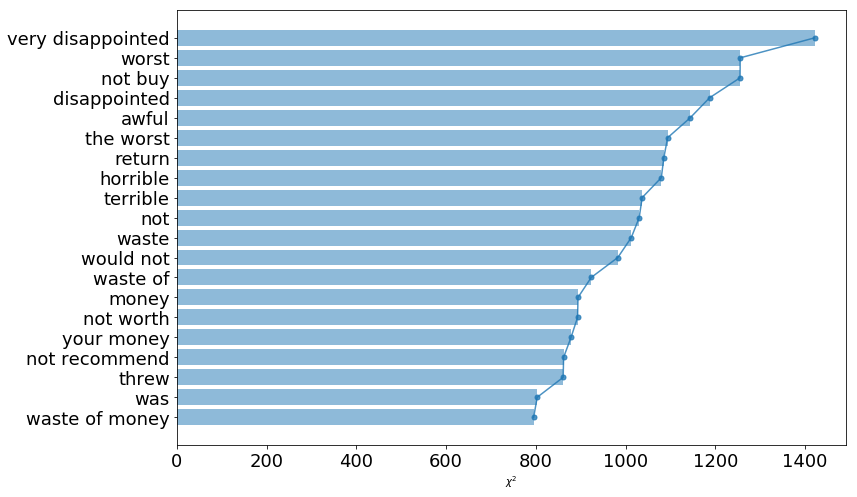

In [138]:
plt.figure(figsize=(12,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels, fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('$\chi^2$')
plt.show();